## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.901986  1.272639  1.110129  1.035108 -0.161078  0.875605
1 -0.269965  0.034888  0.670793  1.533061 -1.490737  0.583444
2  1.145583  1.078848  0.005840  1.373713 -0.915658  0.642995
3  1.386592  1.056002  1.217074 -1.297793 -0.845560 -0.591610
4 -0.285803  0.394247 -0.448232  1.710332  1.080310  1.437262


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9729722	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9630096	total: 58ms	remaining: 29s
2:	learn: 0.9526877	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9425607	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9338617	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9239519	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9127540	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9032976	total: 61.1ms	remaining: 7.58s
8:	learn: 0.8947811	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8867782	total: 62ms	remaining: 6.14s
10:	learn: 0.8779893	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8692678	total: 63.1ms	remaining: 5.19s
12:	learn: 0.8603498	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8516081	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8443321	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8370925	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8293758	total: 66ms	remaining: 3.82s
17:	learn: 0.8207588	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8142835	total: 67.1ms	remaining: 3.46s
1

89:	learn: 0.4357070	total: 104ms	remaining: 1.05s
90:	learn: 0.4319395	total: 104ms	remaining: 1.04s
91:	learn: 0.4286156	total: 105ms	remaining: 1.03s
92:	learn: 0.4251957	total: 105ms	remaining: 1.02s
93:	learn: 0.4215336	total: 106ms	remaining: 1.02s
94:	learn: 0.4185409	total: 107ms	remaining: 1.01s
95:	learn: 0.4155752	total: 107ms	remaining: 1.01s
96:	learn: 0.4127753	total: 107ms	remaining: 1000ms
97:	learn: 0.4100917	total: 108ms	remaining: 991ms
98:	learn: 0.4070410	total: 108ms	remaining: 984ms
99:	learn: 0.4034499	total: 109ms	remaining: 977ms
100:	learn: 0.4005577	total: 109ms	remaining: 970ms
101:	learn: 0.3971741	total: 109ms	remaining: 963ms
102:	learn: 0.3945002	total: 110ms	remaining: 956ms
103:	learn: 0.3913696	total: 110ms	remaining: 951ms
104:	learn: 0.3886203	total: 111ms	remaining: 944ms
105:	learn: 0.3859108	total: 111ms	remaining: 939ms
106:	learn: 0.3828297	total: 112ms	remaining: 932ms
107:	learn: 0.3796109	total: 112ms	remaining: 925ms
108:	learn: 0.3769579	

224:	learn: 0.1736273	total: 171ms	remaining: 590ms
225:	learn: 0.1724377	total: 172ms	remaining: 589ms
226:	learn: 0.1713927	total: 172ms	remaining: 587ms
227:	learn: 0.1702975	total: 173ms	remaining: 585ms
228:	learn: 0.1691940	total: 173ms	remaining: 583ms
229:	learn: 0.1677303	total: 174ms	remaining: 581ms
230:	learn: 0.1668414	total: 174ms	remaining: 580ms
231:	learn: 0.1657407	total: 175ms	remaining: 578ms
232:	learn: 0.1645594	total: 175ms	remaining: 576ms
233:	learn: 0.1634439	total: 176ms	remaining: 575ms
234:	learn: 0.1625430	total: 176ms	remaining: 574ms
235:	learn: 0.1616198	total: 177ms	remaining: 572ms
236:	learn: 0.1605230	total: 177ms	remaining: 570ms
237:	learn: 0.1594823	total: 178ms	remaining: 569ms
238:	learn: 0.1584247	total: 178ms	remaining: 567ms
239:	learn: 0.1573777	total: 178ms	remaining: 565ms
240:	learn: 0.1563942	total: 179ms	remaining: 564ms
241:	learn: 0.1552824	total: 179ms	remaining: 562ms
242:	learn: 0.1544386	total: 180ms	remaining: 560ms
243:	learn: 

427:	learn: 0.0604819	total: 271ms	remaining: 363ms
428:	learn: 0.0601242	total: 272ms	remaining: 362ms
429:	learn: 0.0598428	total: 273ms	remaining: 362ms
430:	learn: 0.0594933	total: 273ms	remaining: 361ms
431:	learn: 0.0591288	total: 274ms	remaining: 360ms
432:	learn: 0.0590370	total: 274ms	remaining: 359ms
433:	learn: 0.0586807	total: 274ms	remaining: 358ms
434:	learn: 0.0585901	total: 275ms	remaining: 357ms
435:	learn: 0.0582418	total: 275ms	remaining: 356ms
436:	learn: 0.0581523	total: 276ms	remaining: 355ms
437:	learn: 0.0580638	total: 276ms	remaining: 354ms
438:	learn: 0.0577947	total: 277ms	remaining: 353ms
439:	learn: 0.0574562	total: 277ms	remaining: 353ms
440:	learn: 0.0573500	total: 278ms	remaining: 352ms
441:	learn: 0.0570887	total: 278ms	remaining: 351ms
442:	learn: 0.0569834	total: 279ms	remaining: 350ms
443:	learn: 0.0566348	total: 279ms	remaining: 350ms
444:	learn: 0.0563065	total: 280ms	remaining: 349ms
445:	learn: 0.0560241	total: 280ms	remaining: 348ms
446:	learn: 

595:	learn: 0.0336051	total: 355ms	remaining: 240ms
596:	learn: 0.0334245	total: 355ms	remaining: 240ms
597:	learn: 0.0333487	total: 356ms	remaining: 239ms
598:	learn: 0.0332788	total: 356ms	remaining: 238ms
599:	learn: 0.0331609	total: 357ms	remaining: 238ms
600:	learn: 0.0330454	total: 357ms	remaining: 237ms
601:	learn: 0.0329800	total: 357ms	remaining: 236ms
602:	learn: 0.0328311	total: 358ms	remaining: 236ms
603:	learn: 0.0327293	total: 358ms	remaining: 235ms
604:	learn: 0.0325300	total: 359ms	remaining: 234ms
605:	learn: 0.0324660	total: 359ms	remaining: 234ms
606:	learn: 0.0322432	total: 360ms	remaining: 233ms
607:	learn: 0.0320730	total: 360ms	remaining: 232ms
608:	learn: 0.0320070	total: 360ms	remaining: 231ms
609:	learn: 0.0318858	total: 361ms	remaining: 231ms
610:	learn: 0.0317779	total: 361ms	remaining: 230ms
611:	learn: 0.0315907	total: 362ms	remaining: 229ms
612:	learn: 0.0314405	total: 362ms	remaining: 229ms
613:	learn: 0.0312767	total: 362ms	remaining: 228ms
614:	learn: 

807:	learn: 0.0152258	total: 454ms	remaining: 108ms
808:	learn: 0.0151390	total: 455ms	remaining: 107ms
809:	learn: 0.0150963	total: 455ms	remaining: 107ms
810:	learn: 0.0150115	total: 456ms	remaining: 106ms
811:	learn: 0.0149738	total: 456ms	remaining: 106ms
812:	learn: 0.0149456	total: 457ms	remaining: 105ms
813:	learn: 0.0149086	total: 457ms	remaining: 104ms
814:	learn: 0.0148677	total: 458ms	remaining: 104ms
815:	learn: 0.0147853	total: 458ms	remaining: 103ms
816:	learn: 0.0147576	total: 459ms	remaining: 103ms
817:	learn: 0.0147173	total: 459ms	remaining: 102ms
818:	learn: 0.0146817	total: 460ms	remaining: 102ms
819:	learn: 0.0146351	total: 460ms	remaining: 101ms
820:	learn: 0.0146079	total: 461ms	remaining: 100ms
821:	learn: 0.0145684	total: 461ms	remaining: 99.8ms
822:	learn: 0.0145229	total: 461ms	remaining: 99.2ms
823:	learn: 0.0144960	total: 462ms	remaining: 98.6ms
824:	learn: 0.0144513	total: 462ms	remaining: 98.1ms
825:	learn: 0.0144247	total: 463ms	remaining: 97.5ms
826:	le

985:	learn: 0.0091636	total: 537ms	remaining: 7.63ms
986:	learn: 0.0091559	total: 538ms	remaining: 7.08ms
987:	learn: 0.0091133	total: 538ms	remaining: 6.54ms
988:	learn: 0.0091058	total: 539ms	remaining: 5.99ms
989:	learn: 0.0090590	total: 539ms	remaining: 5.45ms
990:	learn: 0.0090347	total: 540ms	remaining: 4.9ms
991:	learn: 0.0090273	total: 540ms	remaining: 4.36ms
992:	learn: 0.0090200	total: 541ms	remaining: 3.81ms
993:	learn: 0.0089874	total: 541ms	remaining: 3.27ms
994:	learn: 0.0089801	total: 542ms	remaining: 2.72ms
995:	learn: 0.0089618	total: 542ms	remaining: 2.18ms
996:	learn: 0.0089543	total: 543ms	remaining: 1.63ms
997:	learn: 0.0089193	total: 543ms	remaining: 1.09ms
998:	learn: 0.0089015	total: 544ms	remaining: 544us
999:	learn: 0.0088695	total: 544ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

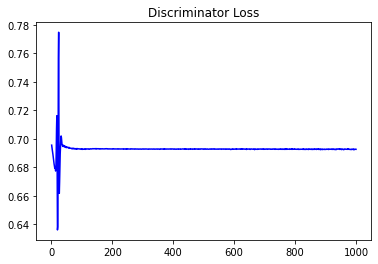

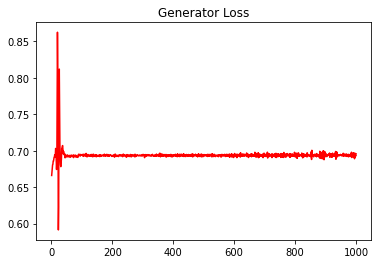

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1142119327649386


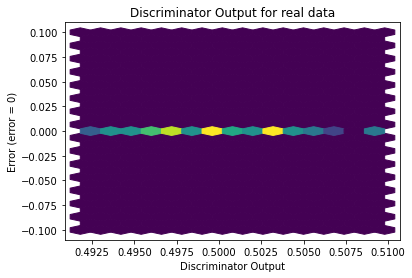

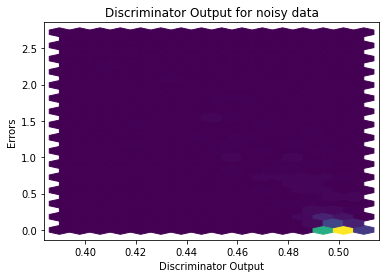

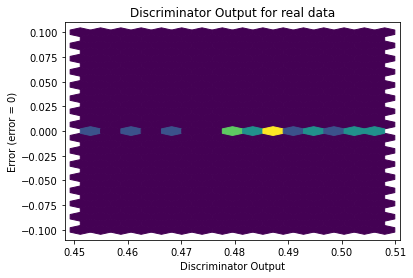

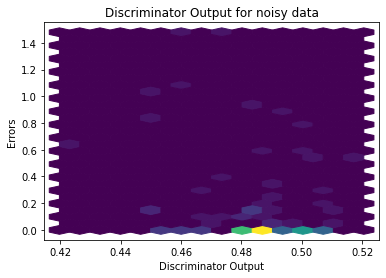

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


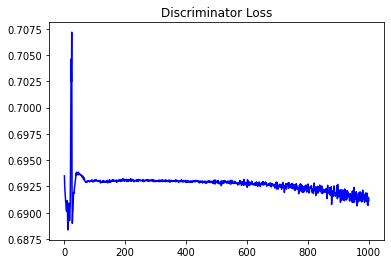

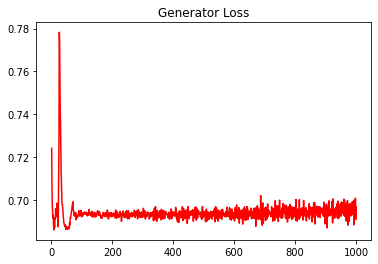

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1725597761276224


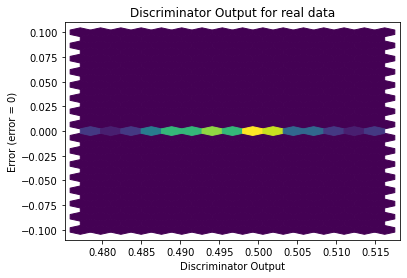

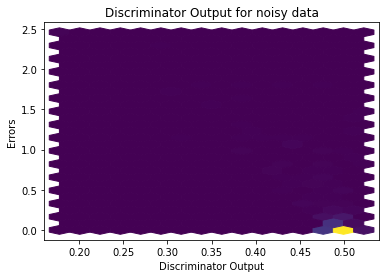

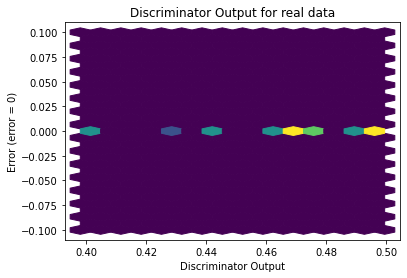

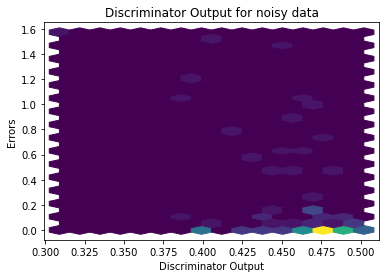

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2814]], requires_grad=True)
